In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

file_path = Path(r"C:\Users\KIIT0001\Downloads\archive\spotify_analysis_dataset.csv")
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

Dataset Shape: (50, 16)

First few rows:
  track_id track_name     artist     album release_date  duration_ms  \
0  TRK1000     Song 0   Artist 7   Album 3   2010-01-01       240151   
1  TRK1001     Song 1   Artist 4   Album 5   2010-01-02       253767   
2  TRK1002     Song 2  Artist 13  Album 19   2010-01-03       244375   
3  TRK1003     Song 3  Artist 11   Album 7   2010-01-04       299262   
4  TRK1004     Song 4   Artist 8   Album 9   2010-01-05       256330   

   popularity  danceability  energy  loudness  speechiness  acousticness  \
0          70         0.037   0.349     -2.87        0.522         0.616   
1          58         0.610   0.726    -22.87        0.770         0.635   
2          85         0.503   0.897     -1.33        0.216         0.045   
3          27         0.051   0.887     -1.46        0.623         0.375   
4          65         0.279   0.780     -5.88        0.085         0.626   

   instrumentalness  liveness  valence   tempo  
0             0.931 

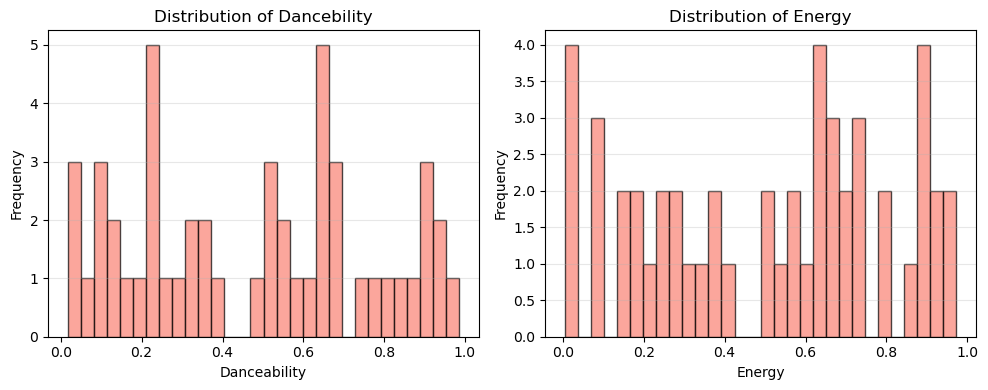

In [8]:
# 1. Plot the distribution of a feature using matplotlib.pyplot.hist()
# Example: Distribution of Danceability
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(df['danceability'], bins=30, edgecolor='black', alpha=0.7, color='salmon')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Distribution of Dancebility')
plt.grid(axis='y', alpha=0.3)

# Distribution of Energy
plt.subplot(1, 2, 2)
plt.hist(df['energy'], bins=30, edgecolor='black', alpha=0.7, color='salmon')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Energy')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_21276\3133169173.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_15_data, y='artist', order=top_artists.index, palette='viridis', edgecolor='black')


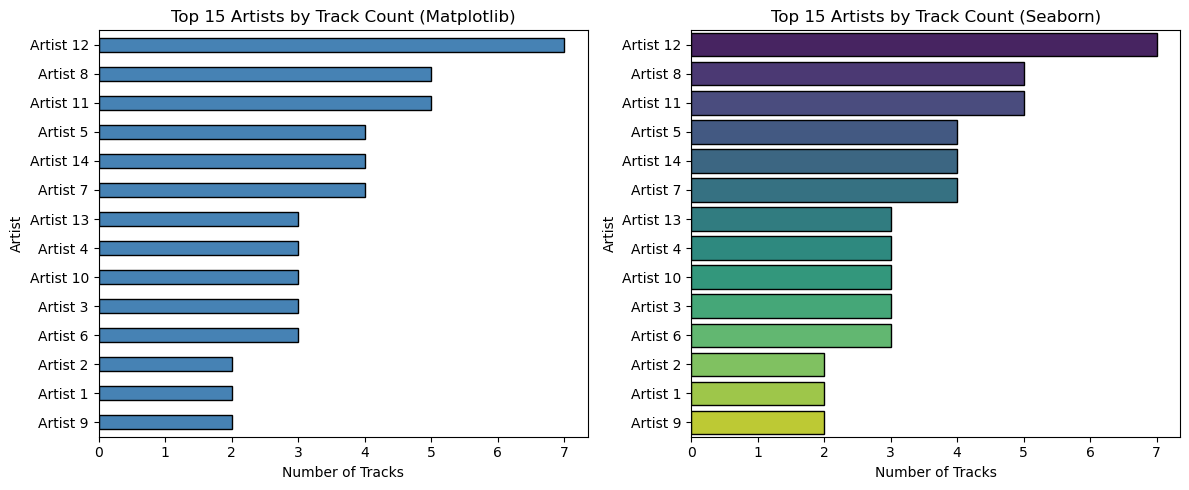

In [9]:
# 2. Show how many samples belong to each category of a categorical attribute
# Top Artists by number of tracks
plt.figure(figsize=(12, 5))

# Get top 15 artists
top_artists = df['artist'].value_counts().head(15)

# Using matplotlib/pandas bar plot
plt.subplot(1, 2, 1)
top_artists.plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.title('Top 15 Artists by Track Count (Matplotlib)')
plt.gca().invert_yaxis()

# Using seaborn
plt.subplot(1, 2, 2)
top_15_data = df[df['artist'].isin(top_artists.index)]
sns.countplot(data=top_15_data, y='artist', order=top_artists.index, palette='viridis', edgecolor='black')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.title('Top 15 Artists by Track Count (Seaborn)')

plt.tight_layout()
plt.show()

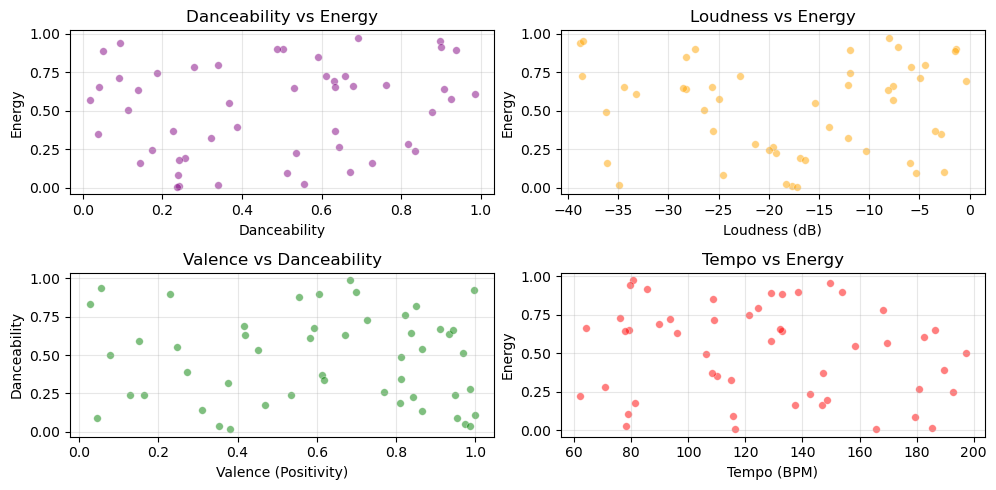

In [11]:
# 3. Create scatter plots to understand relationships between features
plt.figure(figsize=(10, 5))

# Scatter plot 1: Danceability vs Energy
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='danceability', y='energy', alpha=0.5, s=30, color='purple')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Danceability vs Energy')
plt.grid(alpha=0.3)

# Scatter plot 2: Loudness vs Energy
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='loudness', y='energy', alpha=0.5, s=30, color='orange')
plt.xlabel('Loudness (dB)')
plt.ylabel('Energy')
plt.title('Loudness vs Energy')
plt.grid(alpha=0.3)

# Scatter plot 3: Valence vs Danceability
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='valence', y='danceability', alpha=0.5, s=30, color='green')
plt.xlabel('Valence (Positivity)')
plt.ylabel('Danceability')
plt.title('Valence vs Danceability')
plt.grid(alpha=0.3)

# Scatter plot 4: Tempo vs Energy
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='tempo', y='energy', alpha=0.5, s=30, color='red')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Energy')
plt.title('Tempo vs Energy')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

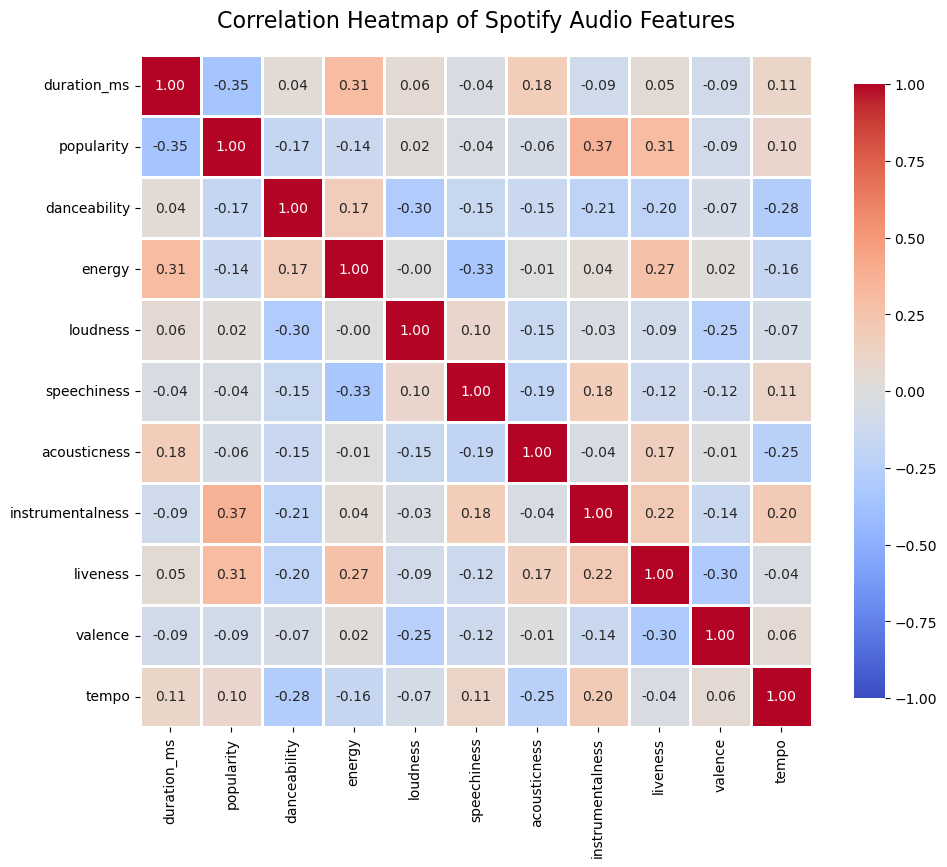

In [12]:
# 4. Use a correlation heatmap to find relationships between features
plt.figure(figsize=(10, 9))

# Select all numeric audio features
audio_features = ['duration_ms', 'popularity', 'danceability', 'energy', 
                  'loudness', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence', 'tempo']

# Calculate correlation matrix
correlation_matrix = df[audio_features].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={'shrink': 0.8},
            vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Spotify Audio Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()



In [6]:
# Print key correlations and insights
print("\n" + "="*70)
print("KEY INSIGHTS FROM CORRELATION ANALYSIS")
print("="*70)
print("\nFull Correlation Matrix:")
print(correlation_matrix.round(3))

# Find strongest positive correlations (excluding diagonal)
print("\n\nStrongest Positive Correlations (>0.3):")
print("-" * 70)
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if corr_value > 0.3:
            correlations.append((correlation_matrix.columns[i], 
                               correlation_matrix.columns[j], 
                               corr_value))

for feat1, feat2, corr in sorted(correlations, key=lambda x: x[2], reverse=True):
    print(f"{feat1:20s} <-> {feat2:20s}: {corr:6.3f}")

# Find strongest negative correlations
print("\n\nStrongest Negative Correlations (<-0.3):")
print("-" * 70)
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if corr_value < -0.3:
            correlations.append((correlation_matrix.columns[i], 
                               correlation_matrix.columns[j], 
                               corr_value))

for feat1, feat2, corr in sorted(correlations, key=lambda x: x[2]):
    print(f"{feat1:20s} <-> {feat2:20s}: {corr:6.3f}")

print("\n" + "="*70)


KEY INSIGHTS FROM CORRELATION ANALYSIS

Full Correlation Matrix:
                  duration_ms  popularity  danceability  energy  loudness  \
duration_ms             1.000      -0.352         0.041   0.310     0.060   
popularity             -0.352       1.000        -0.166  -0.138     0.020   
danceability            0.041      -0.166         1.000   0.173    -0.296   
energy                  0.310      -0.138         0.173   1.000    -0.000   
loudness                0.060       0.020        -0.296  -0.000     1.000   
speechiness            -0.039      -0.042        -0.150  -0.328     0.097   
acousticness            0.180      -0.060        -0.146  -0.006    -0.153   
instrumentalness       -0.094       0.369        -0.210   0.044    -0.034   
liveness                0.048       0.305        -0.204   0.266    -0.093   
valence                -0.088      -0.093        -0.068   0.020    -0.252   
tempo                   0.105       0.099        -0.277  -0.156    -0.071   

         

In [13]:
# Additional insights
print("\n\nADDITIONAL STATISTICS:")
print("=" * 70)
print(f"Total number of tracks: {len(df)}")
print(f"Number of unique artists: {df['artist'].nunique()}")
print(f"Number of unique albums: {df['album'].nunique()}")
print(f"Average popularity: {df['popularity'].mean():.2f}")
print(f"Most popular track: {df.loc[df['popularity'].idxmax(), 'track_name']} by {df.loc[df['popularity'].idxmax(), 'artist']}")
print(f"Average tempo: {df['tempo'].mean():.2f} BPM")
print(f"Average duration: {df['duration_ms'].mean()/60000:.2f} minutes")
print("="*70)



ADDITIONAL STATISTICS:
Total number of tracks: 50
Number of unique artists: 14
Number of unique albums: 18
Average popularity: 50.32
Most popular track: Song 20 by Artist 5
Average tempo: 126.09 BPM
Average duration: 3.55 minutes
